In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

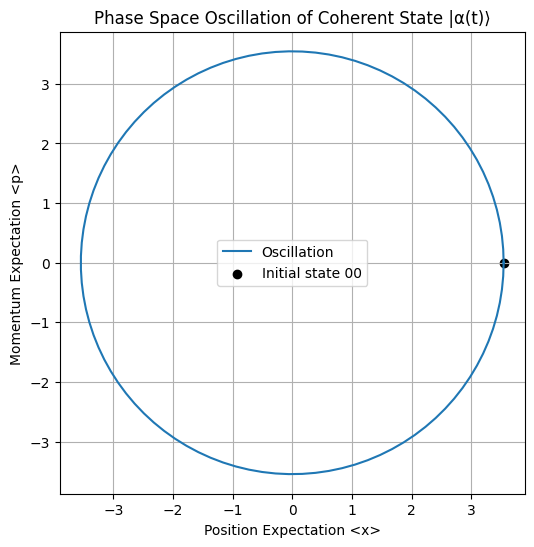

In [11]:
omega = 2 * np.pi 
m = 1  
hbar = 1

N = 20
a = destroy(N)
a_dag = create(N)

# Hamiltonian H_0 = ħω(a†a + 1/2)
H_0 = hbar * omega * (a_dag * a + 1/2)

# coherent state |α⟩ with α = 1
alpha = 1
coherent_state = displace(N, alpha) * basis(N, 0)

# Time evolution operator U(t) function
def time_evolution_operator(t):
    return (-1j * H_0 * t / hbar).expm()

# Period of the oscillator T = 2π/ω
T = 2 * np.pi / omega
times = np.linspace(0, T, 100)

# calculate the time-evolved states |α(t)⟩ = U(t)|α⟩
alpha_t_states = [time_evolution_operator(t) * coherent_state for t in times]

x = (np.sqrt(hbar / 2 * m * omega))  * (a + a_dag) # position operator
p = (1j * np.sqrt(m * hbar * omega / 2)) * (a_dag - a)  # momentum operator

x_expectation_values = [expect(x, state) for state in alpha_t_states]
p_expectation_values = [expect(p, state) for state in alpha_t_states]

# Plot the expectation values in the phase space
plt.figure(figsize=(6, 6))
plt.plot(x_expectation_values, p_expectation_values, label='Oscillation')
plt.scatter(x_expectation_values[0], p_expectation_values[0], color='black', label='Initial state 00')
plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Oscillation of Coherent State |α(t)⟩')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()


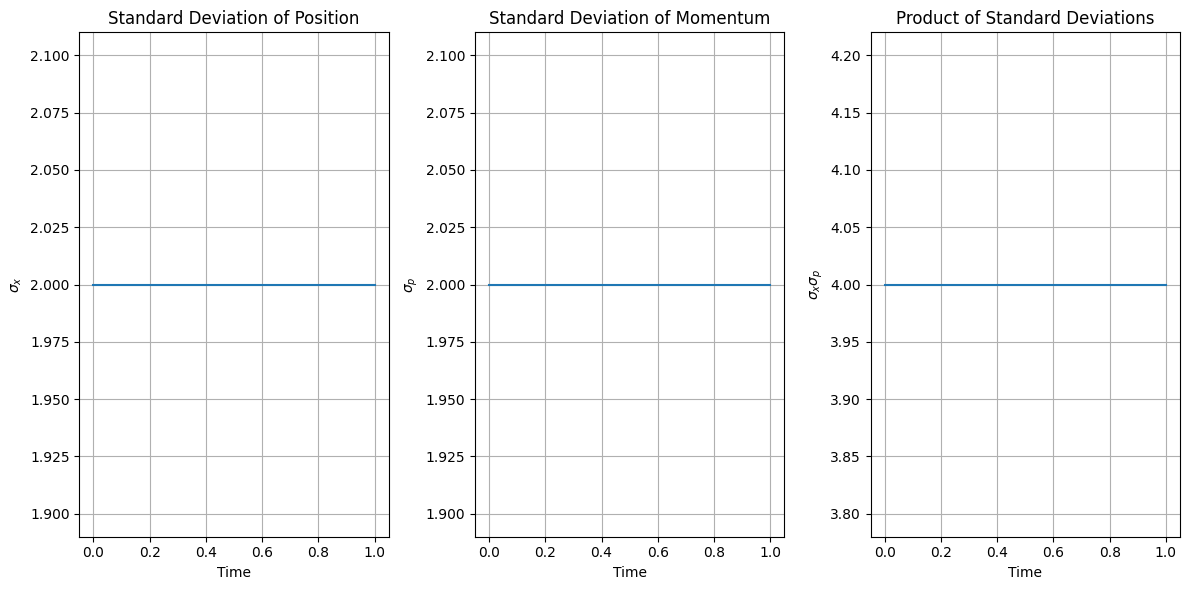

In [12]:
x_expect = np.array([expect(x, state) for state in alpha_t_states])
x2_expect = np.array([expect(x**2, state) for state in alpha_t_states])

p_expect = np.array([expect(p, state) for state in alpha_t_states])
p2_expect = np.array([expect(p**2, state) for state in alpha_t_states])

# calculate standard deviations
sigma_x = np.sqrt(x2_expect - x_expect**2).round()
sigma_p = np.sqrt(p2_expect - p_expect**2).round()
sigma_xp = sigma_x * sigma_p.round()

# plot standard deviations and their product over time
plt.figure(figsize=(12, 6))

# Plot sigma_x
plt.subplot(1, 3, 1)
plt.plot(times, sigma_x, label=r'$\sigma_x$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x$')
plt.title('Standard Deviation of Position')
plt.grid(True)

# Plot sigma_p
plt.subplot(1, 3, 2)
plt.plot(times, sigma_p, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_p$')
plt.title('Standard Deviation of Momentum')
plt.grid(True)

# Plot sigma_x * sigma_p
plt.subplot(1, 3, 3)
plt.plot(times, sigma_xp, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Product of Standard Deviations')
plt.grid(True)

plt.tight_layout()
plt.show()



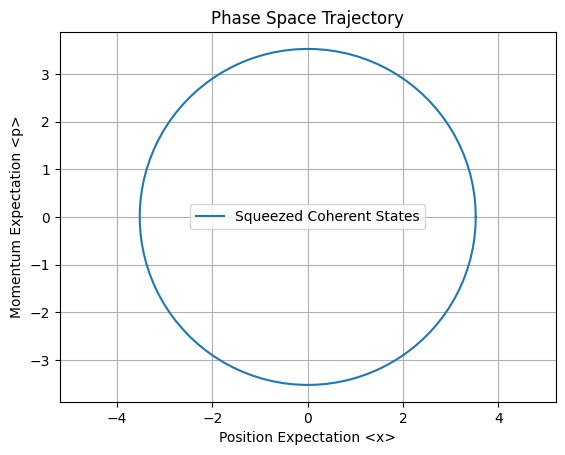

In [16]:
r = 1  # Squeeze parameter r
z = r  # QuTiP uses z for the squeeze parameter r

squeezed_initial = squeeze(N, z) * basis(N, 0)
squeezed_choerence = displace(N, alpha) * squeezed_initial

alpha_states = [time_evolution_operator(t) * squeezed_choerence for t in times]

# calculate standard deviation
def standard_deviation(op, states):
    return np.sqrt(np.array([expect(op**2, state) - expect(op, state)**2 for state in states]))


sigma_x_squeezed = standard_deviation(x, alpha_states)
sigma_p_squeezed = standard_deviation(p, alpha_states)

# Calculate the product of standard deviations
sigma_xp_squeezed = sigma_x_squeezed * sigma_p_squeezed

plt.plot(expect(x, alpha_states), expect(p, alpha_states), label='Squeezed Coherent States')
plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Trajectory')
plt.legend()
plt.axis('equal')
plt.grid(True)


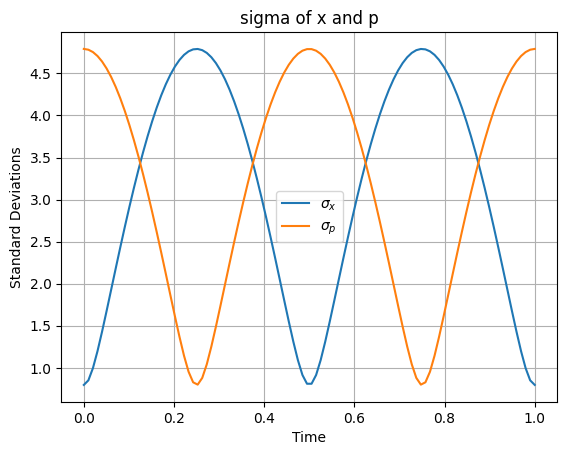

In [17]:

plt.plot(times, sigma_x_squeezed, label=r'$\sigma_x$')
plt.plot(times, sigma_p_squeezed, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Standard Deviations')
plt.title('sigma of x and p')
plt.legend()
plt.grid(True)


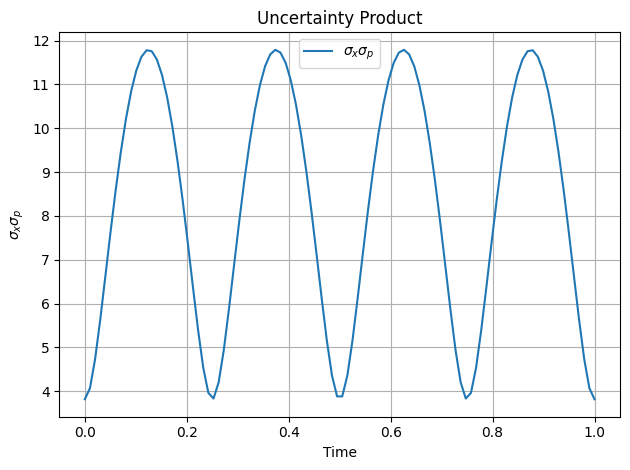

In [18]:

plt.plot(times, sigma_xp_squeezed, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Uncertainty Product')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

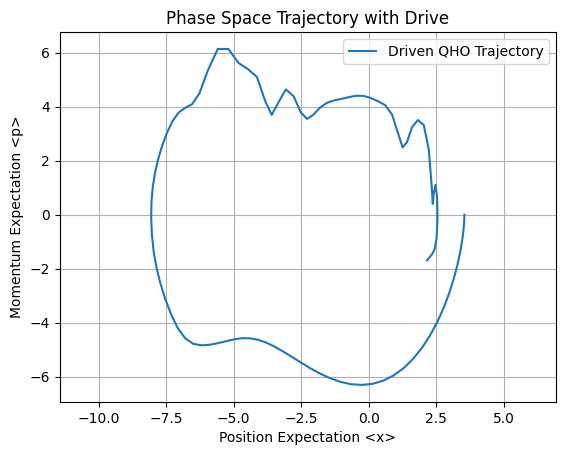

In [19]:
beta_1 = 1
beta_2 = 1

def drive1_coeff(t, args):
    return beta_1 * np.sin(2 * omega * t)

def drive2_coeff(t, args):
    return beta_2 * np.sin(2 * omega * t)

drive_1 = [x, drive1_coeff]
drive_2 = [x**2, drive2_coeff]

# complete Hamiltonian with the drive
H = [H_0, drive_1, drive_2]

# solve the time-dependent schrodinger equation
result = sesolve(H, coherent_state, times)

# calculate expectation values and uncertainties for x and p
x_expectation_values = expect(x, result.states)
p_expectation_values = expect(p, result.states)
sigma_x = np.sqrt(expect(x**2, result.states) - x_expectation_values**2)
sigma_p = np.sqrt(expect(p**2, result.states) - p_expectation_values**2)
sigma_xp = sigma_x * sigma_p


plt.plot(x_expectation_values, p_expectation_values, label='Driven QHO Trajectory')
plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Trajectory with Drive')
plt.legend()
plt.axis('equal')
plt.grid(True)


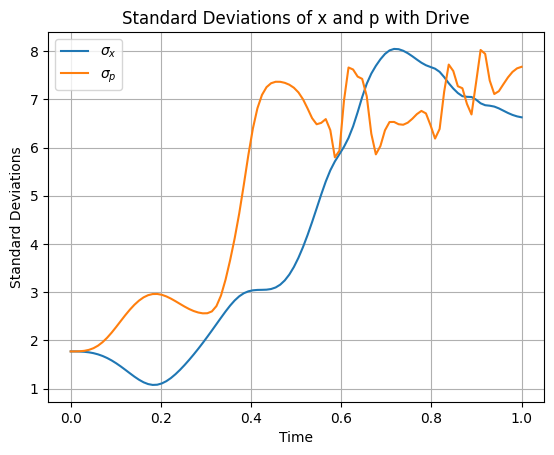

In [21]:

plt.plot(times, sigma_x, label=r'$\sigma_x$')
plt.plot(times, sigma_p, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Standard Deviations')
plt.title('Standard Deviations of x and p with Drive')
plt.legend()
plt.grid(True)


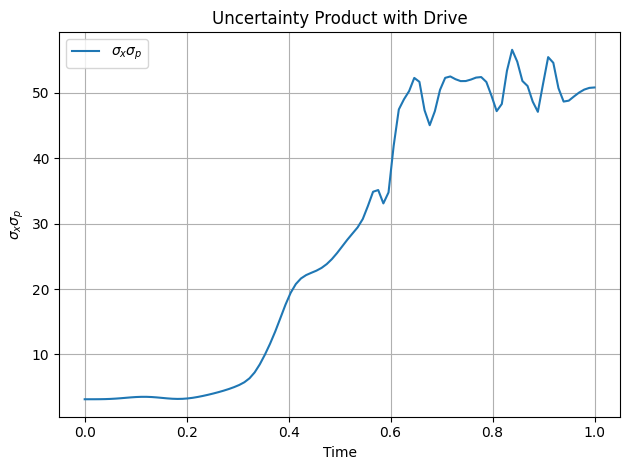

In [22]:

plt.plot(times, sigma_xp, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Uncertainty Product with Drive')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Setting B1 to 0
​
Eliminates the linear driving force, leaving only the quadratic term in the potential. This term alone causes a time-dependent change in the curvature of the potential experienced by the oscillator, causing squeezing along one axis and stretched along the other, alternating with time according to the sin(2ωt) term